<a href="https://colab.research.google.com/github/ksemina61/task1semestr/blob/main/%D0%9C%D0%9E%2C_%D1%81%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80_%D0%B8_%D0%B4%D0%B7_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 2 (семинар)

Поработайте с датасетом affairs. Предскажите значение в колонке affairs по остальным факторам.

Сначала проведите разведочный анализ, а именно, исследуйте зависимость таргета от каждого фактора (или пары факторов).

Обучите линейную регрессию, посмотрите на качество на кросс-валидации, затем разбейте данные на train и test, обучите алгоритм на train и сделайте предсказания на train и test, выведите ошибки.

Посмотрите на матрицу корреляций факторов и целевой переменной. Если есть пары сильно коррелирующих между собой факторов, удалите один из пары.

Если есть факторы, слабо коррелирующие с таргетом, удалите их.

Заново обучите алгоритм на обновленных данных. Как изменилось его качество?



In [ ]:
# Для начала выгружу все библиотеки, которые мне понадобятся
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression # линейная регрессия
from sklearn.model_selection import cross_val_score, train_test_split
# train_test_split - разбивает данные на обучающие и тестовые наборы
# cross_val_score - кросс валидация, оценка набора данных.
from sklearn.metrics import mean_squared_error # нужно для линейной регрессии
import seaborn as sns # для нагладности, построение графиков
import matplotlib.pyplot as plt # для наглядности, построение графиков, диаграмм.

df = pd.read_csv('affairs.csv')
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


Кросс-валидация — метод оценки аналитической модели и её поведения на независимых данных.

Обычно кросс-валидация используется в ситуациях, где целью является предсказание, и хотелось бы оценить, насколько предсказывающая модель способна работать на практике.

Один цикл кросс-валидации включает разбиение набора данных на части, затем построение модели на одной части (называемой тренировочным набором), и валидация модели на другой части (называемой тестовым набором).

 Чтобы уменьшить разброс результатов, разные циклы кросс-валидации проводятся на разных разбиениях, а результаты валидации усредняются по всем циклам.

In [ ]:
df.info() # на всякий случай посмотрим на тип данных для дальнейшей работы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
dtypes: float64(9)
memory usage: 447.7 KB


Сначала исследую зависимость (столбца affairs) от каждого фактора (переменной). Использую графики для визуализации этой зависимости. Построю графики scatter plot для числовых переменных. Исходя из матрицы, которая была построена, можно увидеть, что признаки age, yrs_married, children коррелируют друг с другом, также признаки education, occupation также корретируют друг с другом.

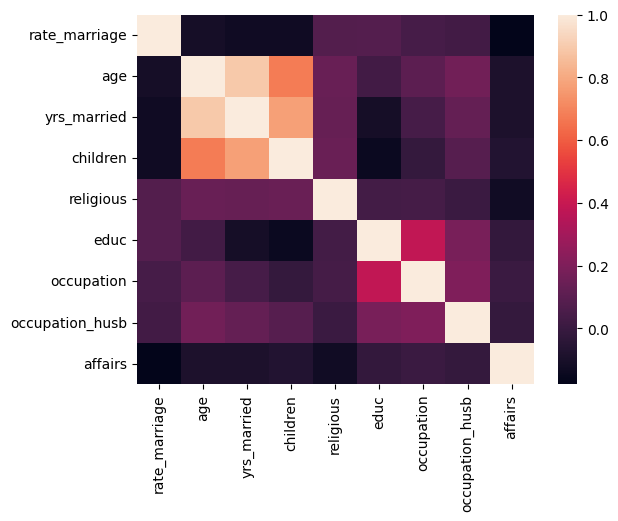

In [ ]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
data=pd.read_csv("affairs.csv")
dataplot=sb.heatmap(data.corr())
mp.show()

Посмотрим потробнее на корреляцию признаков между собой.
Есть функция Seaborn Pairplot, которая позволяет создавать сетку осей, через которую каждая числовая переменная, хранящаяся в данных, распределяется по осям X и Y в структуре столбцов и строк. Можно создать точечные графики, чтобы отображать попарные отношения в дополнение к графику распределения, отображающему распределение данных в столбце по диагонали.

Функцию pairplot() также можно использовать для демонстрации подмножества переменных, или мы можем нанести различные типы переменных на строки и столбцы.


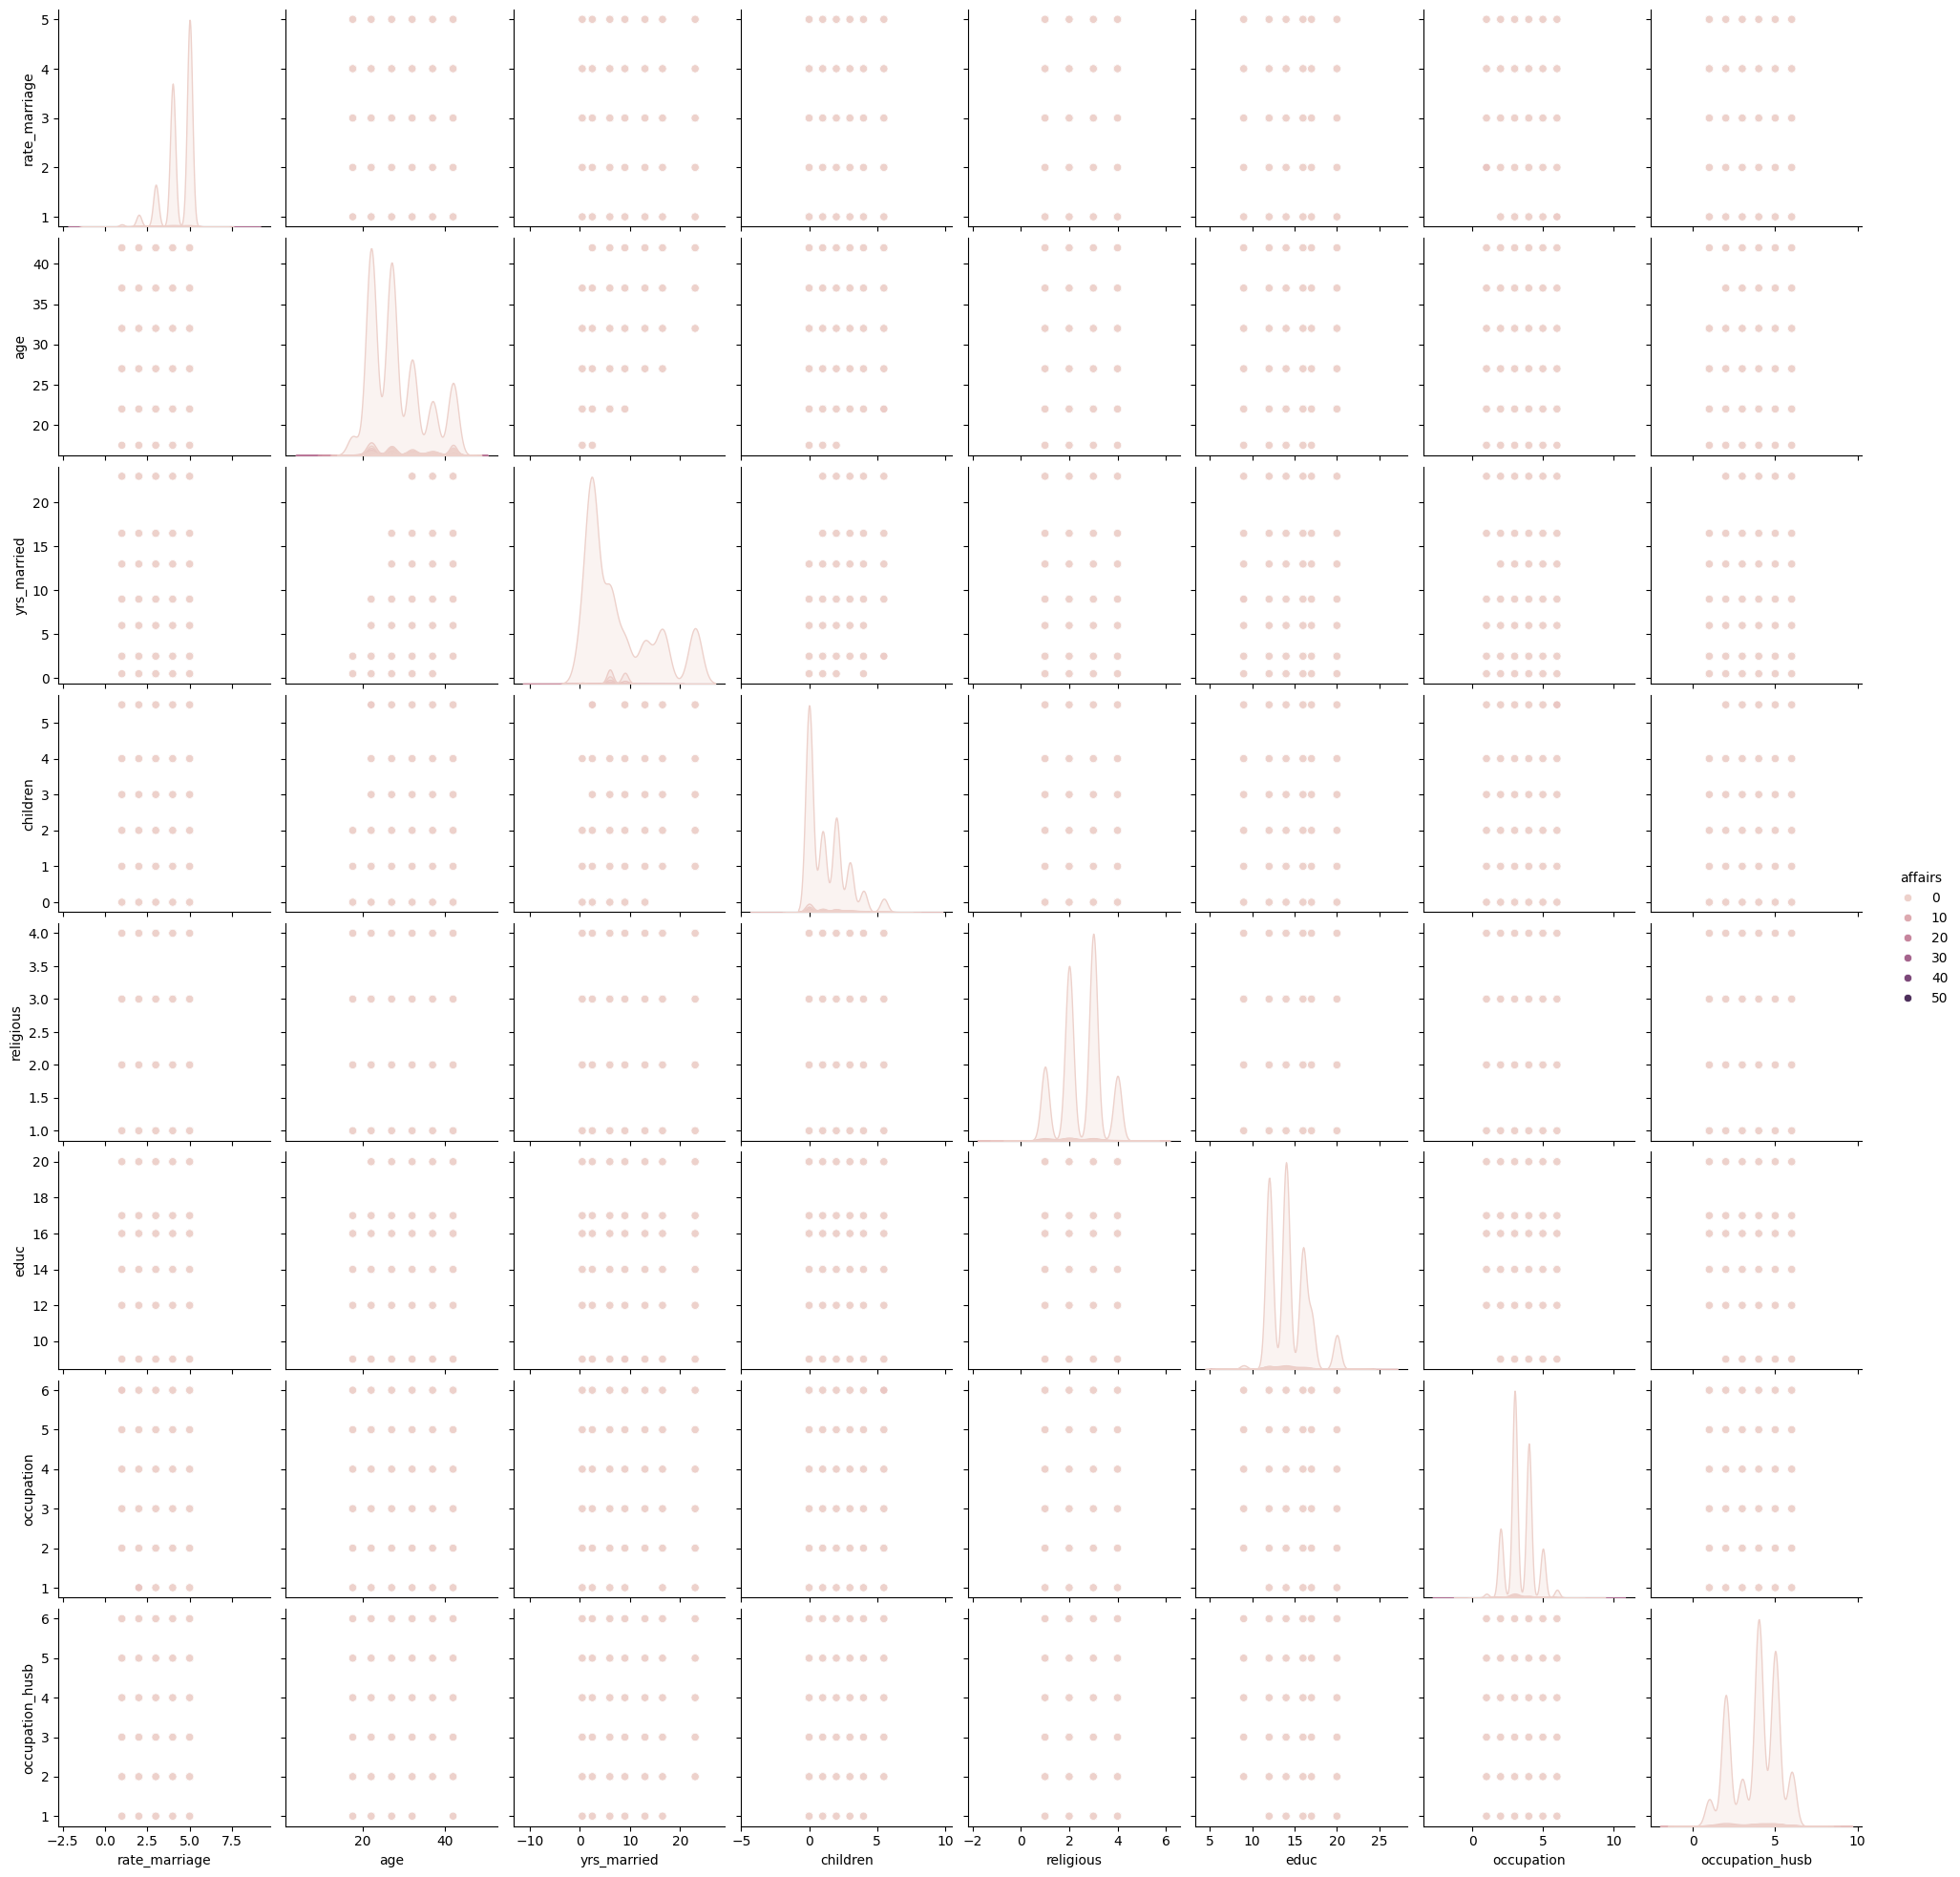

In [ ]:
sns.pairplot(df, hue='affairs') # поедлим данные по целевой переменной
plt.show()
# На диагоналях распределение признака внутри каждого таргета
# Недиагональные элементы - зависимость одного признака от другого для каждого таргета

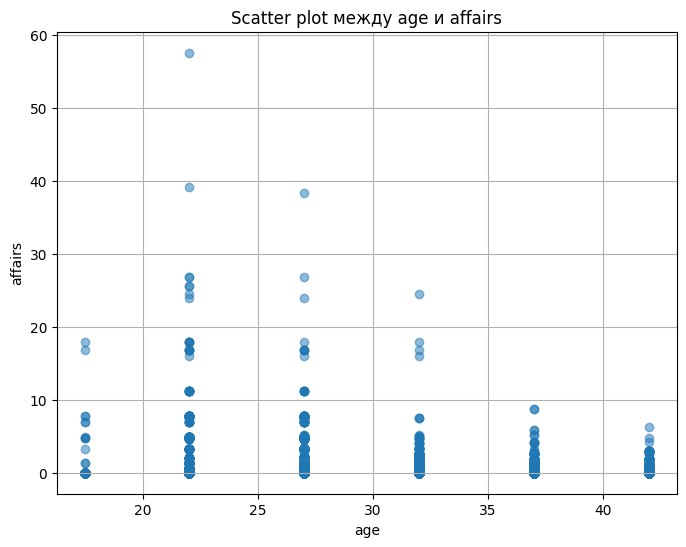

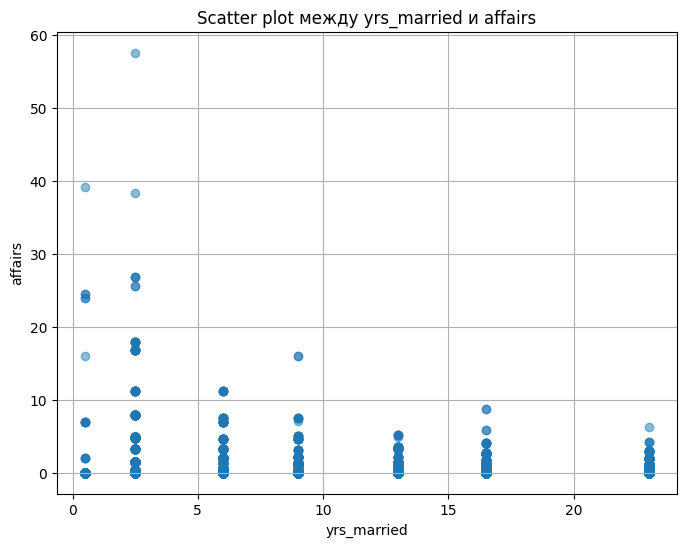

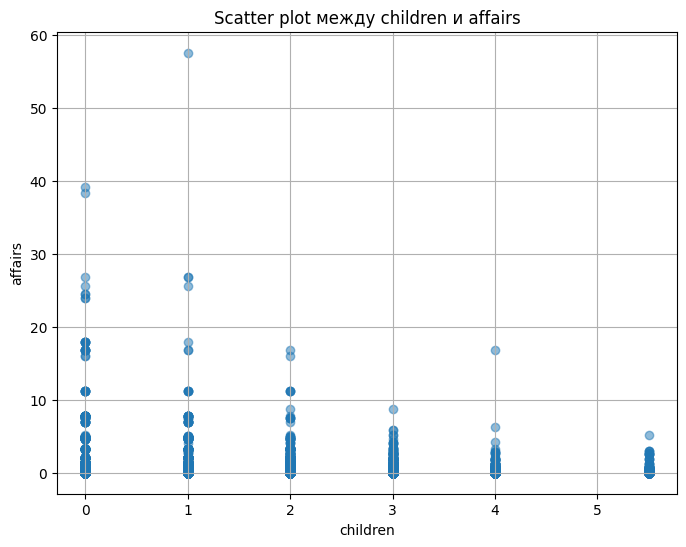

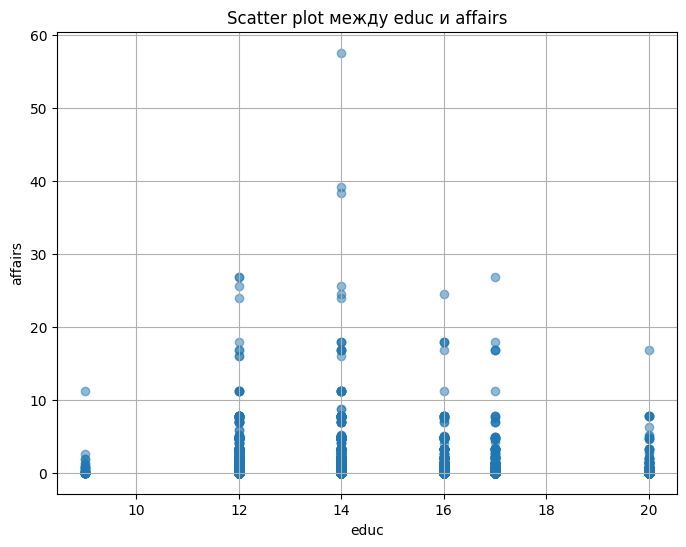

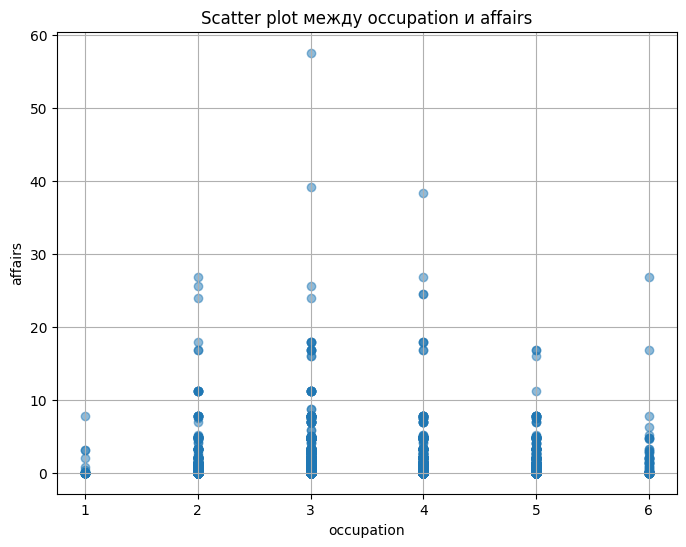

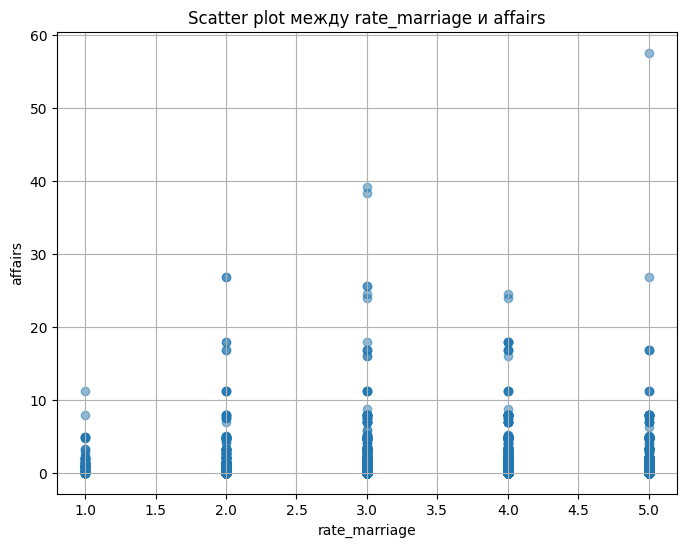

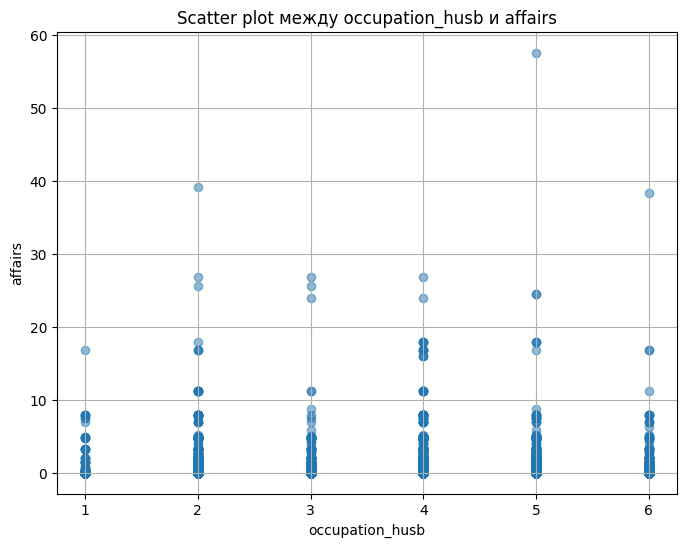

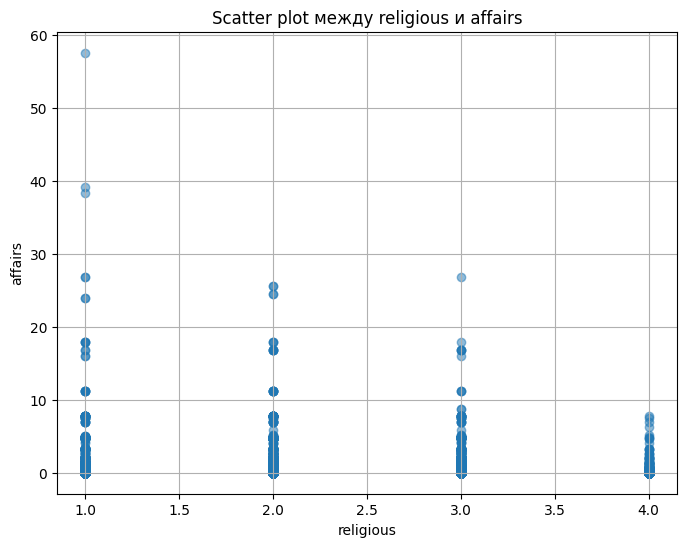

In [ ]:
# Посмотри еще раз корреляции через mathplotlib
# Определю список числовых переменных для анализа
numerical_features = ['age', 'yrs_married', 'children', 'educ', 'occupation', 'rate_marriage', 'occupation_husb', 'religious']
# Построение scatter plot для каждой числовой переменной относительно столбца affairs
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[feature], df['affairs'], alpha=0.5)
    # было установлено значение alpha, чтобы отобразить все точки на графике
    plt.title(f'Scatter plot между {feature} и affairs')
    plt.xlabel(feature)
    plt.ylabel('affairs')
    plt.grid(True)
    plt.show()

In [ ]:
# Мы работаем с данными, имеющий разный масштаб. Если мы применим регуляризацию к таким данным, веса имеют неодинаковый вклад в результат модели.
# Причем штрафуем мы веса одинаково, в итоге получается ошибка. Сначала нужно применить масштабирование к нашим данным. Стандартизируем данные.
df = pd.read_csv('affairs.csv')
from sklearn.preprocessing import StandardScaler # стандартизация
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pylab as plt
X = df[['age', 'yrs_married', 'children', 'educ', 'occupation', 'rate_marriage', 'occupation_husb', 'religious']]
y = df['affairs']
# Далее нужно создать экземпляр объекта StandardScaler перед его использованием
scaler = StandardScaler()
# Теперь применю стандартизацию к признакам (X)
X_scaled = scaler.fit_transform(X)
# Разделю данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Теперь обучу модель линейной регрессии:
model = LinearRegression()
model.fit(X_train, y_train)

# Обучаю Lasso:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Оценю модель и ее качества на тестовом наборе данных
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Для модели с регуляризацией Lasso:
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso Mean Squared Error: {mse_lasso}")
print(f"Lasso R2 Score: {r2_lasso}")

Mean Squared Error: 4.57942996398305
R2 Score: 0.05278842767046832
Lasso Mean Squared Error: 4.612932911900594
Lasso R2 Score: 0.04585866125319782


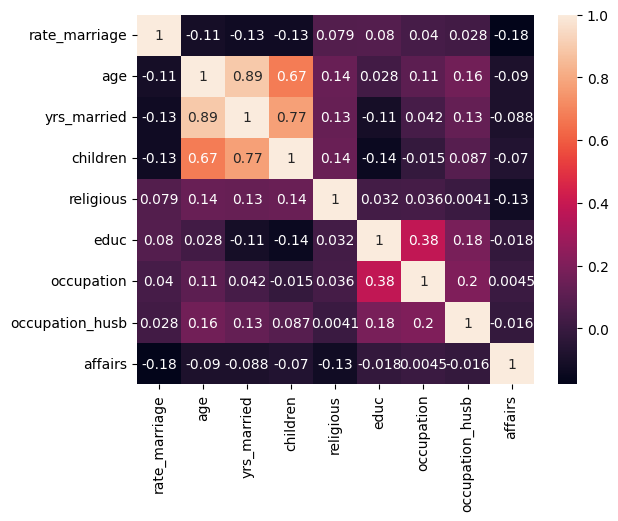

In [ ]:
# Еще раз посмотрю на матрицу корреляций факторов и целевой переменной для того, чтобы удалить некоторые признаки
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [ ]:
df = df.drop(['rate_marriage', 'occupation_husb', 'religious'], axis = 1)
X = df.drop('affairs', axis=1)
y = df['affairs']
# Теперь обучим заново модель, уже после удаления признаков
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
train_mse = mean_squared_error(y_train, train_predictions) ** 0.5
test_mse = mean_squared_error(y_test, test_predictions) ** 0.5

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Train MSE: 2.194291822228132
Test MSE: 2.1888969064948323


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error
# Качество приудаленных признаках
# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание и обучение модели Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

# Предсказание на тестовом наборе
y_pred = lasso.predict(X_test_scaled)

# Оценка качества модели
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred) ** 0.5

print(f'R^2: {r2}')
print(f'MSE: {mse}')


R^2: 0.005435603962095525
MSE: 2.192798205482817


Задание 3.
Поработайте с датасетом House Sales in King County.  Обратите внимание, что не все признаки в датасете полезны. Целевая переменная - очевидно, price.

In [ ]:
# Для начала выгружу все библиотеки, которые мне понадобятся
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression # линейная регрессия
from sklearn.model_selection import cross_val_score, train_test_split
# train_test_split - разбивает данные на обучающие и тестовые наборы
# cross_val_score - кросс валидация, оценка набора данных.
from sklearn.metrics import mean_squared_error # нужно для линейной регрессии
import seaborn as sns # для нагладности, построение графиков
import matplotlib.pyplot as plt # для наглядности, построение графиков, диаграмм.

df = pd.read_csv('house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

id


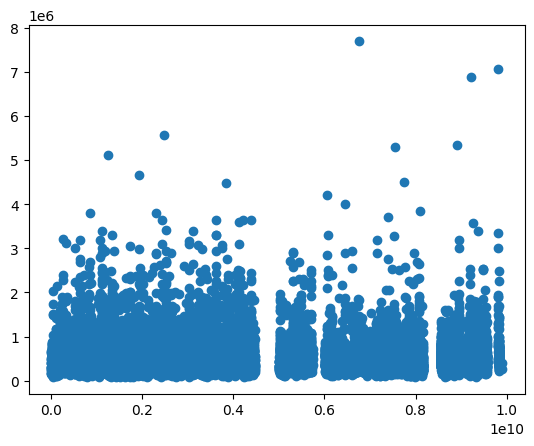

date


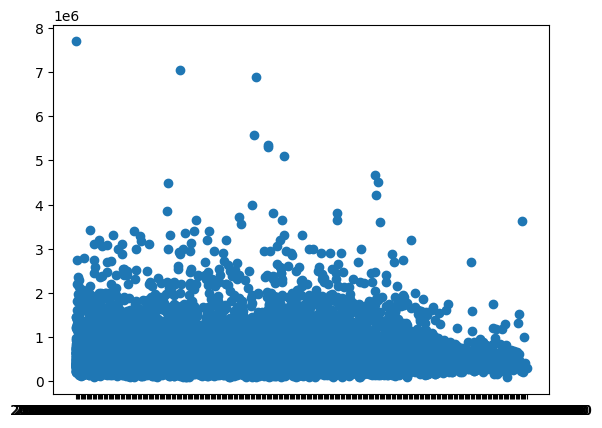

bedrooms


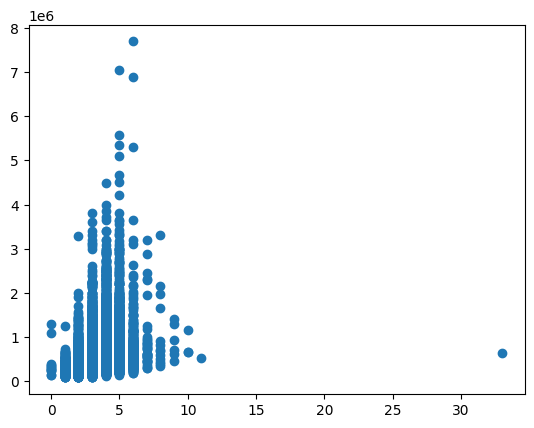

bathrooms


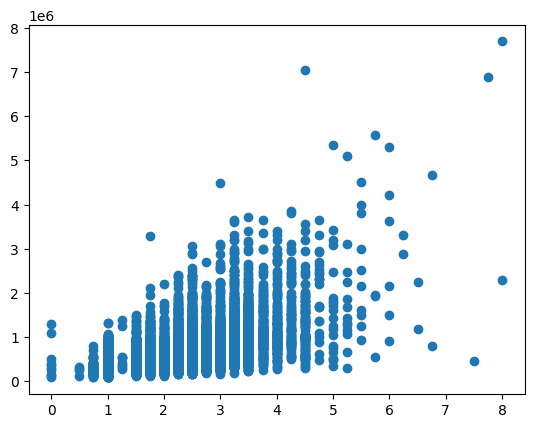

sqft_living


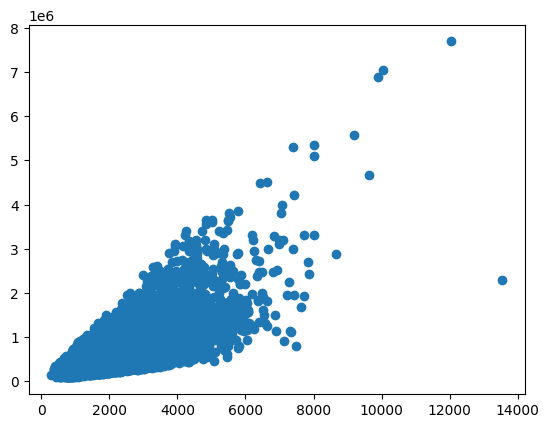

sqft_lot


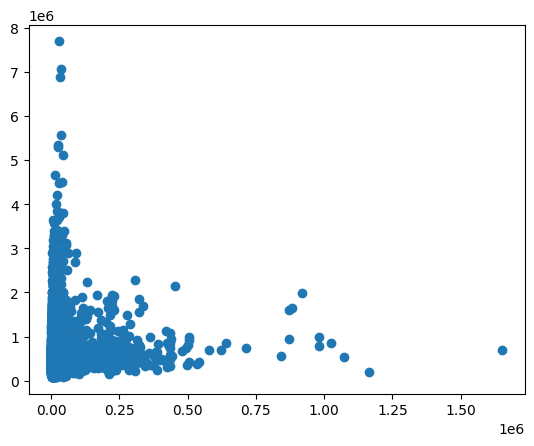

floors


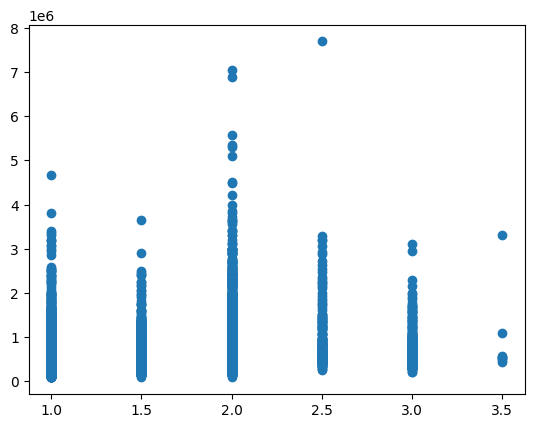

waterfront


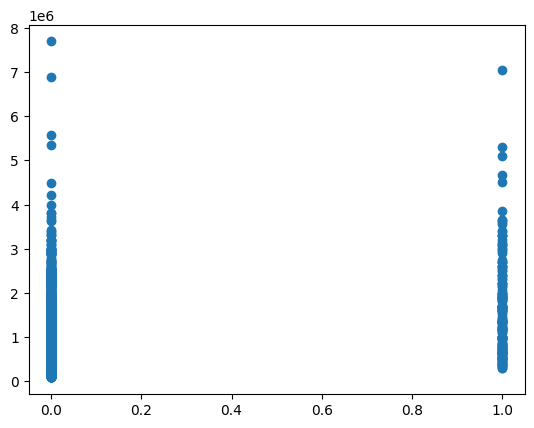

view


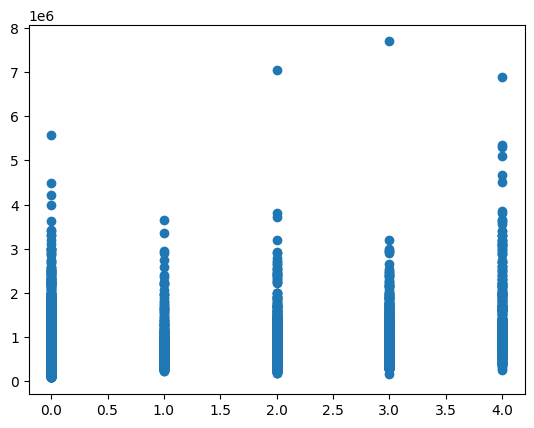

condition


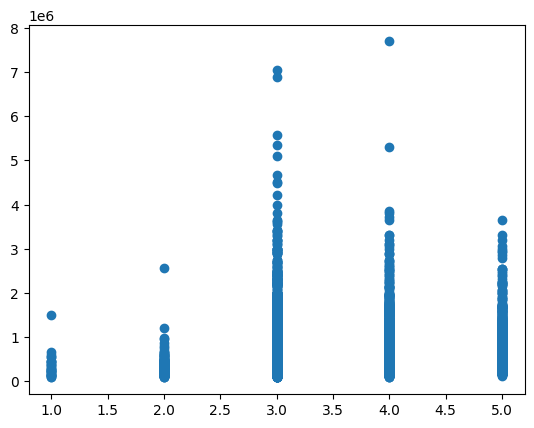

grade


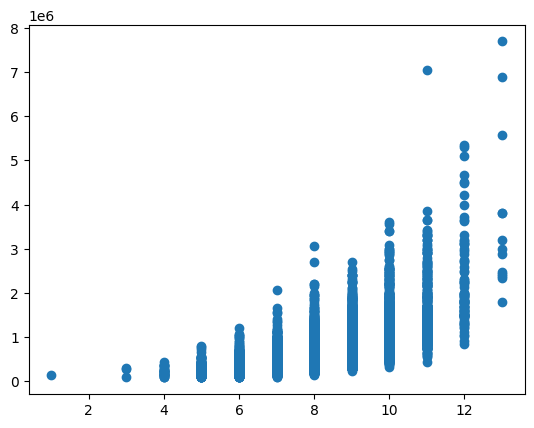

sqft_above


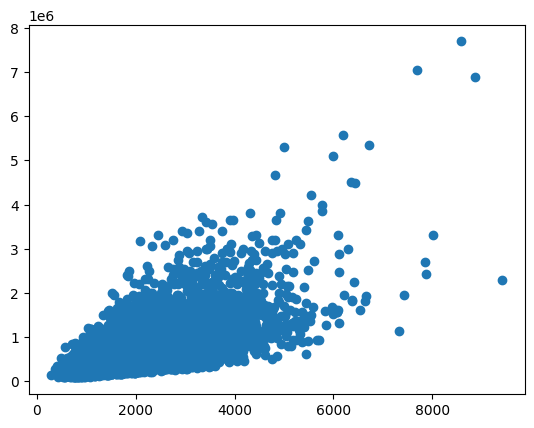

sqft_basement


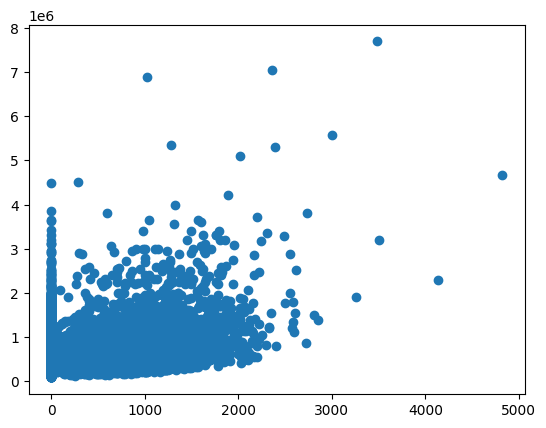

yr_built


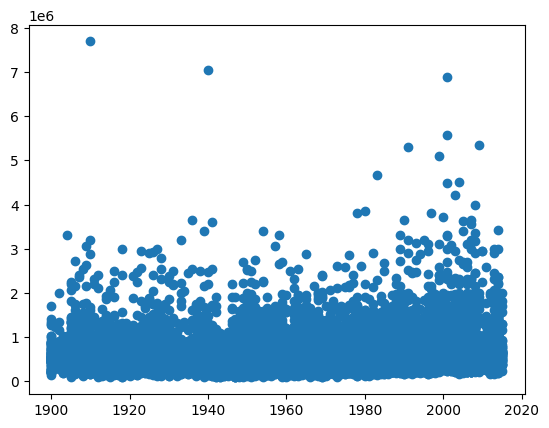

yr_renovated


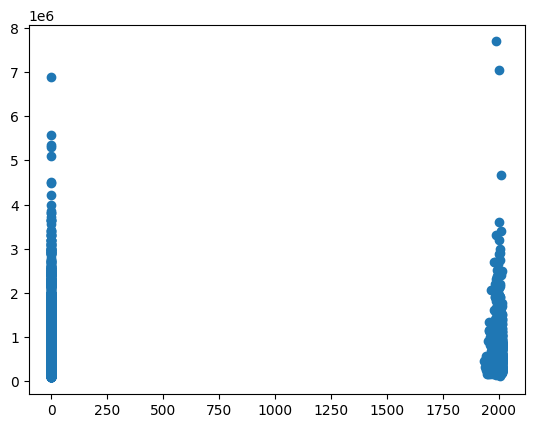

zipcode


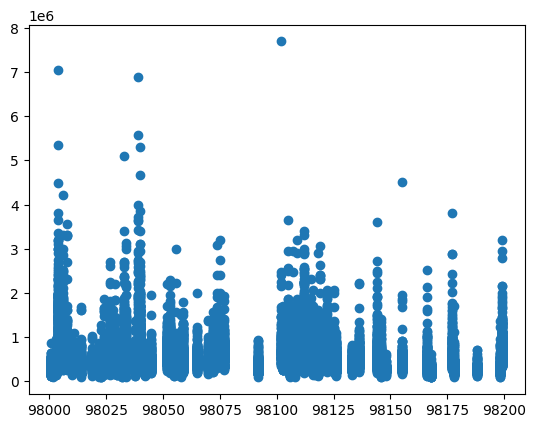

lat


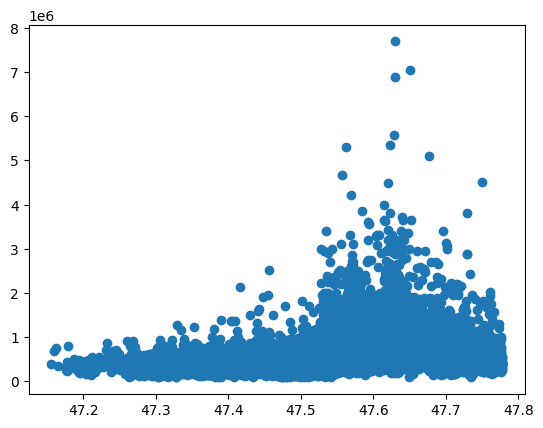

long


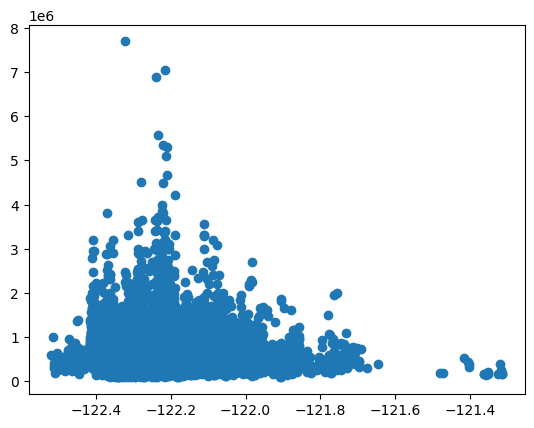

sqft_living15


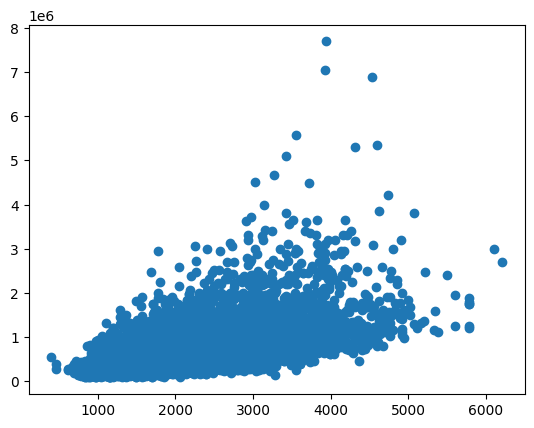

sqft_lot15


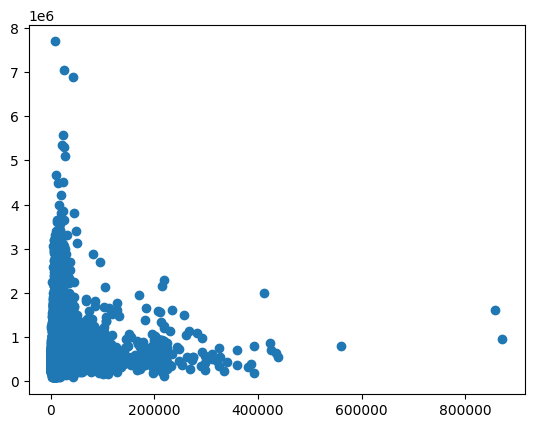

In [ ]:
# Можем изучить каждый признак в отдельности, изучить его распределение с ЦП:

for c in df.columns:
  if c != 'price':  # для себя:
    print(c)
    plt.scatter(df[c], df['price']) # функция из библиотеки matplotlib.pyplot, которая используется для создания точечного графика]) # функция из библиотеки matplotlib.pyplot, которая используется для создания точечного графика
    plt.show() # это функция, которая отображает график, созданный с помощью matplotlib

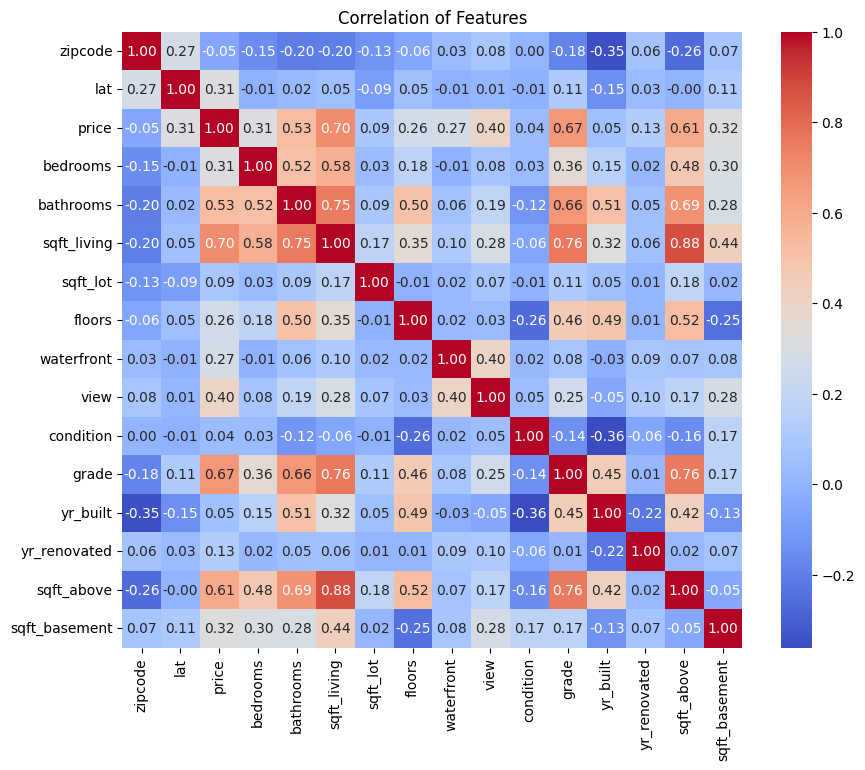

In [ ]:
# Посмотрю другим способом посмотреть, как признаки коррелируют между собой:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('house_data.csv')

features = ['zipcode', 'lat', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'sqft_above', 'sqft_basement']

# Создание подмножества данных с выбранными признаками
subset_df = df[features]

# Построение матрицы корреляции
correlation_matrix = subset_df.corr()

# Визуализация матрицы корреляции с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Features')
plt.show()


Проанализировав несколько зависимостей, лучше взять bedrooms, bathrooms, sqft_living, yr_built, floors, grade, sqrt_above, sqft_basement.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('house_data.csv')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error
df = df.drop(['id', 'date','zipcode','waterfront', 'view', 'yr_renovated', 'lat', 'condition', 'sqft_lot'], axis=1)
# Опять выделю целевую переменную, а затем удалю ее из признаков, чтобы не возникло ошибки
y = df['price']
X = df.drop('price', axis=1)
# Опять разделю данные на обучающие и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state=42)
# Потом нужно стандартизировать признаки:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Применю регуляризацию Lasso и обучу модель
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
# Теперь предскажу на тесте:
y_pred = lasso.predict(X_test_scaled)
# Затем опять оценю качество модели:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred) ** 0.5
print(f'r2: {r2}')
print(f'MSE: {mse}')

r2: 0.6165018197098819
MSE: 240782.04678245282


r2 (коэффициент детерминации)
MSE (среднеквадратичная ошибка).

r2 - это метрика, которая показывает, насколько хорошо модель объясняет вариацию целевой переменной. Чем ближе значение r2 к 1, тем лучше модель объясняет данные. Однако, r2 может быть завышен в случае переобучения модели.

MSE - это метрика, которая измеряет среднеквадратичную ошибку предсказания модели. Чем меньше значение MSE, тем лучше модель предсказывает данные.

При оценке модели на тестовом наборе данных, важно смотреть на обе эти метрики. Хорошая модель должна иметь высокое значение r2 и низкое значение MSE.

В моей модели что-то не очень все красиво, большая среднеквадратичная ошибка, r2 тоже достаточно большой, но хотя бы не 1.

Небольшой конспект для себя еще раз:

Регуляризация нужна для того, чтобы модель из переобученной стала нормально обученной.
Lasso учитывает сумму модулей весов.

Ridge учитывает сумму квадратов весов.

Elastic Net - учитывается и сумма модулей и квадраты, только с разными коэффициентами.

Мультиколинеальность - когда столбцы в датасете линейно зависимы.

Если коэффициент регуляризации маленький, то веса могут быть, очень большими, следовательно, модель переобучена.

Если коэффициент регуляризации большой, то веса маленькие, признак зануляется, а следовательно, он не важный и можно его убрать.

Домашнее задание № 2

Задание 1

Поработайте с датасетом про цены мобильных телефонов, обучите регрессию.

In [ ]:
data = pd.read_csv('Cellphone.csv')
data.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


<Axes: >

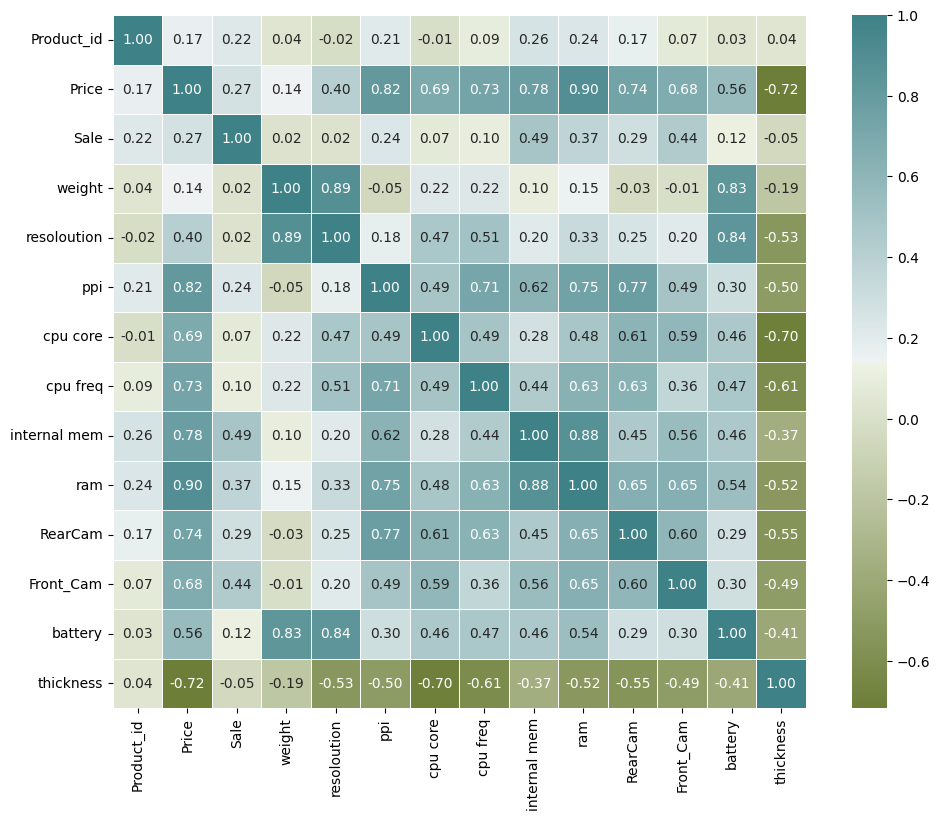

In [ ]:
import seaborn as sns
import numpy as np
from matplotlib import pylab as plt
plt.figure(figsize=(12, 9))
corr = data.corr()
sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

In [ ]:
# Посмотрим, какие тут есть значения, вдруг есть NaN:
data.info()
# Пустых значений нет, есть float, int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from matplotlib import pylab as plt
data = pd.read_csv('Cellphone.csv')
# Удалю плохо коррелируемые признаки, к ним относятся:
data.drop(['Sale', 'Product_id', 'weight', 'resoloution'], axis=1)
data.copy()
# Мы работаем с данными, имеющий разный масштаб. Если мы применим регуляризацию к таким данным, веса имеют неодинаковый вклад в результат модели.
# Причем штрафуем мы веса одинаково, в итоге получается ошибка.Для этого используется стандартизация данных.
X = data.drop('Price', axis=1)
y = data['Price']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=111)

scaler = StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)

ypred_train = regressor.predict(Xtrain)
ypred_test = regressor.predict(Xtest)
# Посмотрю на результаты:
print(r2_score(ytrain,ypred_train))
print(r2_score(ytest,ypred_test))

0.9522767204892085
0.9436339582501975


In [ ]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)
coefficients

In [73]:
# Теперь попробуем поработать с Lasso или L1 регуляризация:
regressor2 = Lasso(alpha=10)
regressor2.fit(Xtrain, ytrain)
ypred2 = regressor2.predict(Xtest)
print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))
print(regressor2.coef_,'\n')

Scores: 0.9428088182749902 46737.82237896283
[  -0.59512245    0.          -42.0710902    -0.          187.91426714
  122.25915656   40.34866249  150.8899319   144.8153092     0.98323203
   22.12865268   87.25860247 -137.95655832] 



In [74]:
#  L1-регуляризация зануляет некоторые веса и таким образом производит отбор признаков
for a in np.arange(0.1,100.1,25):
  regressor2 = Lasso(alpha=a)
  regressor2.fit(Xtrain, ytrain)
  ypred2 = regressor2.predict(Xtest)
  print('alpha={}'.format(a))
  print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))
  print(regressor2.coef_,'\n')

alpha=0.1
Scores: 0.943686000206666 46020.971072867615
[-2.94758382e+00  6.69843818e+00 -9.27816780e+01 -7.59313348e+01
  1.80746422e+02  1.13951021e+02  5.66073606e+01  1.26956580e+02
  1.13935393e+02  2.05157149e-01  3.29149750e+01  2.17571776e+02
 -1.63352907e+02] 

alpha=25.1
Scores: 0.9390703707799503 49792.95937257119
[  -0.            0.           -0.           -0.          182.49960906
  125.74017431   36.53850362  146.71700562  172.5768183     0.
   11.54895931   30.36584822 -132.33160139] 

alpha=50.1
Scores: 0.9324128464686073 55233.62661115528
[  -0.            0.            0.            0.          167.02181443
  121.35439494   30.48972409  124.42350698  205.18650244    0.
    0.           12.98307007 -124.68377381] 

alpha=75.1
Scores: 0.9216253727974424 64049.374304303026
[  -0.            0.            0.            0.          154.26089674
  111.22012808   24.590247     99.31360253  231.51398313    0.
    0.            0.         -116.57342811] 



In [81]:
# Теперь нужно подобрать оптимальное значение параметра регуляризации по кросс-валидации:
from sklearn.linear_model import LassoCV
n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)
lasso_cv = LassoCV(alphas=alphas,
                   cv=3, random_state=17)
lasso_cv.fit(X, y)
print(f'{lasso_cv.alpha_}')
regressor2 = Lasso(alpha=lasso_cv.alpha_)
regressor2.fit(Xtrain, ytrain)
ypred2_train = regressor2.predict(Xtrain)
ypred2_test = regressor2.predict(Xtest)
print('Результаты трейна:', r2_score(ytrain,ypred2_train))
print('Результаты теста:', r2_score(ytest,ypred2_test))

7.81105527638191
Результаты трейна: 0.949347642048714
Результаты теста: 0.9437001452950755


In [85]:
# Теперь добавим регуляризацию Ridge или L2:
# Ridge регрессия не зануляет веса.
for a in np.arange(0.1,10.2,2.5):
  regressor3 = Ridge(alpha=a)
  regressor3.fit(Xtrain, ytrain)
  ypred3 = regressor3.predict(Xtest)
  print('alpha={}'.format(a))
  print('Scores:',r2_score(ytest,ypred3), mean_squared_error(ytest,ypred3))
  print(regressor3.coef_)

alpha=0.1
Scores: 0.9437911718637104 45935.022608821586
[  -3.15279149    6.5843932   -90.90971511  -77.24084424  180.16918828
  114.07988804   57.11549792  127.36427313  114.02466339    0.70568049
   32.98845296  216.50798942 -163.43902406]
alpha=2.6
Scores: 0.9459084213074658 44204.76235803677
[  -5.20185897    1.77468363  -68.50409289  -66.25041278  171.519725
  115.97891174   60.27529315  138.63435923  120.78284965    9.47002673
   33.35363319  177.70399929 -154.68784247]
alpha=5.1
Scores: 0.9464702637220872 43745.61305935987
[  -6.14732722   -0.52130537  -58.60612814  -55.32184675  165.65697935
  115.72835103   62.00724245  143.60480749  125.00122605   15.47945605
   34.40632146  155.00538959 -147.85360395]
alpha=7.6
Scores: 0.9464309188484079 43777.766507882545
[  -6.64365049   -1.70986893  -52.47921571  -46.78831274  161.12334601
  114.67340916   63.37029573  145.86472547  127.69767538   20.23232061
   35.77580617  139.72434825 -142.56009506]
alpha=10.1
Scores: 0.946084452546981

In [89]:
# # Опять подберем значение по кросс-валидации:
from sklearn.linear_model import RidgeCV
n_alphas = 200
ridge_alphas = np.logspace(0, 6, n_alphas)
ridge_cv = RidgeCV(alphas=ridge_alphas,
                   scoring='neg_mean_squared_error',
                   cv=3)
ridge_cv.fit(X, y)
print(f'{ridge_cv.alpha_}')

17.225859653987865


In [90]:
regressor3 = Lasso(alpha=ridge_cv.alpha_)
regressor3.fit(Xtrain, ytrain)
ypred3_train = regressor3.predict(Xtrain)
ypred3_test = regressor3.predict(Xtest)
print('Результаты на трейне:', r2_score(ytrain,ypred3_train))
print('Результаты на тесте:', r2_score(ytest,ypred3_test))

Результаты на трейне: 0.943989108384538
Результаты на тесте: 0.9403966164275995


In [ ]:
# Lasso учитывает сумму модулей весов.
# Ridge учитывает сумму квадратов весов. Ridge выглядит безопаснее, так как хотя бы не зануляет данные признаки.
# Хотя если опираться на то, что дано в семинаре, то результаты на Lasso немного лучше, чем на Ridge, но отличия совсем маленькие.

Задание 2.

Поработайте с датасетом diet_data (Его создатель решил похудеть, подсчитывая калории, и ему это действительно удалось; в течение времени, пока худел, он записывал, что и какое он ест).
 Целевая колонка - change.

In [105]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from matplotlib import pylab as plt
data = pd.read_csv('diet_data.csv')
data.head()
# Попробую решить эту задачу только через Ridge

,Date,Stone,Pounds,Ounces,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change
0,7/30/2018,12.0,2.0,6.0,2726.0,1950.0,0.72,1.0,1.0,0.0,0.0,0.0,0.0,-30.0
1,7/31/2018,12.0,0.0,8.0,2696.0,2600.0,0.96,1.0,0.0,0.0,0.0,0.0,0.0,8.0
2,8/1/2018,12.0,1.0,0.0,2704.0,2500.0,0.92,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,8/2/2018,12.0,1.0,0.0,2704.0,1850.0,0.68,1.0,1.0,0.0,1.0,0.0,0.0,-40.0
4,8/3/2018,11.0,12.0,8.0,2664.0,2900.0,1.09,1.0,1.0,0.0,0.0,0.0,0.0,14.0


<ipython-input-106-5d4bf779667b>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

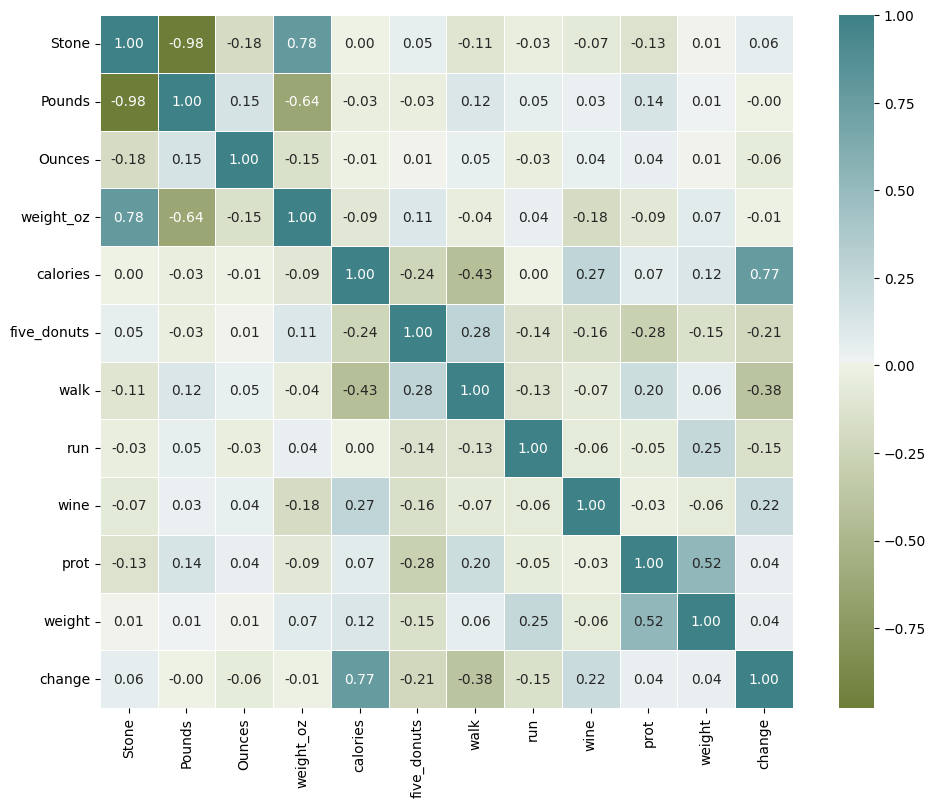

In [106]:
import seaborn as sns
import numpy as np
from matplotlib import pylab as plt
plt.figure(figsize=(12, 9))
corr = data.corr()
sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

In [107]:
data.drop(['Date'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         150 non-null    object 
 1   Stone        142 non-null    float64
 2   Pounds       142 non-null    float64
 3   Ounces       142 non-null    float64
 4   weight_oz    149 non-null    float64
 5   calories     140 non-null    float64
 6   cals_per_oz  147 non-null    object 
 7   five_donuts  140 non-null    float64
 8   walk         140 non-null    float64
 9   run          140 non-null    float64
 10  wine         140 non-null    float64
 11  prot         140 non-null    float64
 12  weight       140 non-null    float64
 13  change       147 non-null    float64
dtypes: float64(12), object(2)
memory usage: 16.6+ KB


In [ ]:
# Получается, что у нас есть один очень важный объект, который называется cal_per_oz и это object, его нужно перевести в число
# Преобразование объекта в число# Преобразование объекта в число
df['cals_per_oz'] = pd.to_numeric(df['cals_per_oz'])
# Замена пропущенных значений средним или медианой
df['cals_per_oz'].fillna(df['cals_per_oz'].mean(), inplace=True)

Elastic Net - учитывается и сумма модулей и квадраты, только с разными коэффициентами. (L1 + L2)

В Ridge и Lasso нас интересует только показатель alpha=1.0, в ElasticNet нас интересует показатель alpha=1.0, l1_ratio=0.5.

In [117]:
data.drop(['Stone', 'Pounds', 'Ounces', 'five_donuts', 'run', 'wine', 'prot', 'weight'], axis= 1, inplace= True)
from sklearn.linear_model import ElasticNet
np.random.seed(0)
X = data.copy().drop('change', axis=1)
y = data['change']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
elastic_net = ElasticNet(alpha=0.5, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)
y_pred = elastic_net.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print('Scores:', r2_score(ytrain,ypred3_train), r2_score(ytest,ypred3_test))

Mean Squared Error: 147.39526667172845
Scores: 0.943989108384538 0.9403966164275995


Задание 3.

Поработайте с датасетом Life Expectancy. Целевая колонка - Life Expectancy, собственно.

In [118]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from matplotlib import pylab as plt
data = pd.read_csv('Life Expectancy.csv')
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
# Александра Михайловна, извините пожалуйста, что отправляю это так поздно, я понимаю, что, возможно, вы не разрешите. Можно ли доделать и показать позже 2 и 3 домашнее задание. У меня просто три недели подряд, включая понедельник (сегодня по Ареальной лингвистике) получается так, что я готовлюсь к презентациям и в основном концентрировалась на них.
# И я, к сожалению, не успела полностью доделать 2 и 3 задания. Если вы не разрешите на баллы досдать, можно хотя бы потом просто показать, чтобы я понимала, верно ли я решаю, может вы скажете, что улучшить.
# С уважением
# Извините пожалуйста, правда, очень неудобно.